In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import matplotlib.pyplot as plt


Loading the MNIST data from keras dataset

In [ ]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 600000 images

Test Data = 10000 images

Image dimension --> 28x28

Grayscale image --> 1 channel

In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


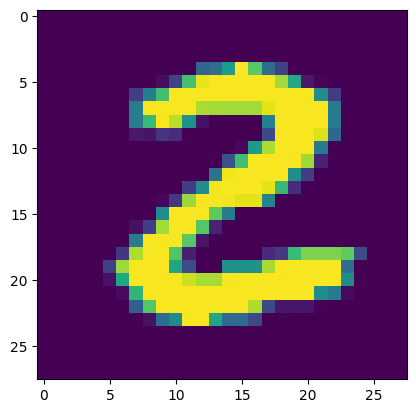

2


In [ ]:
# displaying the image
plt.imshow(X_train[25])
plt.show()
print(Y_train[25])

Image Lables

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0104 - accuracy: 0.6837
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4414 - accuracy: 0.8705
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.8920
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.9028
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.9089
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.9149
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2781 - accuracy: 0.9202
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - accuracy: 0.9251
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2442 - accuracy: 0.9292
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.229

Training data accuracy = 96.49%

In [ ]:
# Accuracy on Test Data:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1618 - accuracy: 0.9530
0.953000009059906


Test data accuracy = 95.92%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


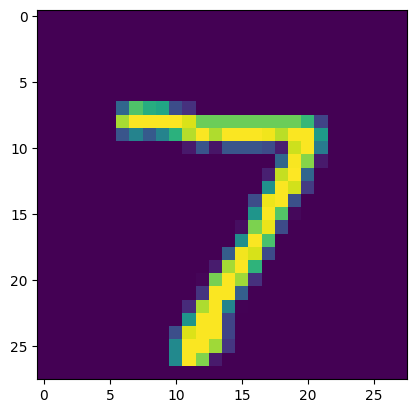

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[2.5726058e-02 7.7442674e-06 1.6923134e-01 9.5138246e-01 4.9408183e-05
 3.8146447e-02 1.8360019e-10 9.9985397e-01 4.5777848e-03 4.3576741e-01]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# convert the prediction probability to calss label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image )

7


In [ ]:
# convert the prediction probability to calss label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[2.57260576e-02 7.74426735e-06 1.69231340e-01 ... 9.99853969e-01
  4.57778480e-03 4.35767412e-01]
 [3.99279408e-03 3.35202426e-01 9.98682737e-01 ... 2.50997772e-07
  5.63646816e-02 6.85713542e-10]
 [1.37116194e-05 9.83452737e-01 8.49344432e-02 ... 8.19526613e-02
  2.22888604e-01 1.65396444e-02]
 ...
 [6.16968100e-06 4.20640663e-06 6.25838933e-04 ... 5.27640693e-02
  5.53228796e-01 8.64392996e-01]
 [2.54795514e-03 4.23727147e-02 1.02523856e-07 ... 4.73735534e-04
  6.63882315e-01 2.53558066e-02]
 [5.14511228e-01 1.59704666e-06 4.83128697e-01 ... 7.87003898e-07
  6.65243417e-02 5.69747608e-05]]


Y_test  --> True Labels

Y_pred_labels --> Predicted labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 968    0    0    2    0    3    2    1    2    2]
 [   0 1112    3    2    0    1    3    2   12    0]
 [  10    2  969   13    5    0   10    6   15    2]
 [   1    1   10  955    0   15    0   11   14    3]
 [   2    0    5    0  922    2   11    2    3   35]
 [   9    2    1   12    1  833   16    0   11    7]
 [   8    3    0    0    3   11  932    0    1    0]
 [   3    6   12    6    1    0    0  973    3   24]
 [   4    3    2   17    6   11    8    7  909    7]
 [   6    3    2   11   13    7    0    7    3  957]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

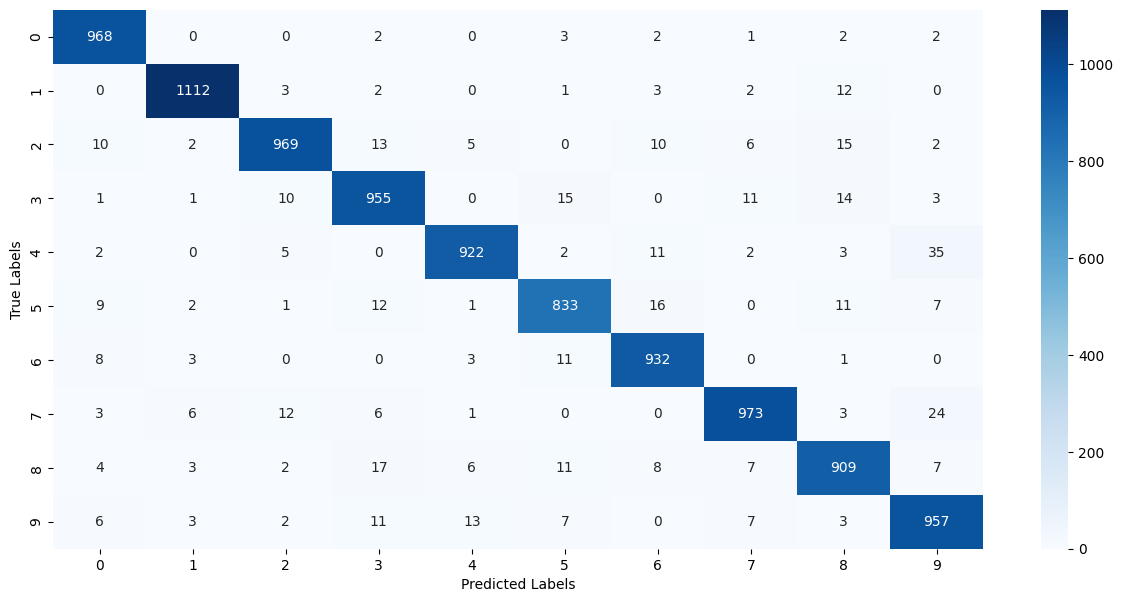

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive system

In [161]:
input_image_path = '/content/drive/MyDrive/MNIST png/2.jpeg'
input_image = cv2.imread(input_image_path)

In [162]:
type(input_image)

numpy.ndarray

In [163]:
print(input_image)

[[[255 255 255]
  [247 247 247]
  [255 255 255]
  ...
  [255 255 255]
  [247 247 247]
  [255 255 255]]

 [[247 247 247]
  [253 253 253]
  [255 255 255]
  ...
  [255 255 255]
  [253 253 253]
  [247 247 247]]

 [[248 248 248]
  [252 252 252]
  [200 200 200]
  ...
  [200 200 200]
  [252 252 252]
  [248 248 248]]

 ...

 [[255 255 255]
  [255 255 255]
  [198 198 198]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 [[251 251 251]
  [255 255 255]
  [254 254 254]
  ...
  [254 254 254]
  [255 255 255]
  [251 251 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


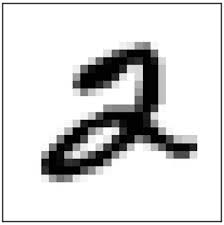

In [164]:
cv2_imshow(input_image)

In [165]:
input_image.shape

(225, 224, 3)

In [166]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [167]:
grayscale.shape

(225, 224)

In [168]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [169]:
input_image_resize.shape

(28, 28)

In [170]:
cv2_imshow(input_image_resize)

In [171]:
input_image_resize= input_image_resize/255

In [172]:
type(input_image_resize)

numpy.ndarray

In [173]:
image_reshaped= np.reshape(input_image_resize,[1,28,28])

In [174]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 27ms/step
[[0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]]


In [175]:
input_pred_label = np.argmax(input_prediction)

In [176]:
print(input_pred_label )

2


predictive

path/content/drive/MyDrive/MNIST png/2.jpeg


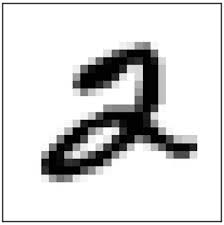

1/1 [==============================] - 0s 46ms/step
The Handwritten Digit is recognised as  2


In [177]:
input_image_path = input('path')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)